In [92]:
#!pip install vitables

In [91]:
#

In [ ]:
## 查看 HDF5 文件的结构
# 使用 h5py 打开并打印 HDF5 文件的结构：

In [103]:
# import h5py

# def print_h5_structure(file_name):
#     def print_attrs(name, obj):
#         print(name)
#         for key, val in obj.attrs.items():
#             print(f"    Attribute: {key} = {val}")

#     with h5py.File(file_name, 'r') as f:
#         f.visititems(print_attrs)

# # 替换为你的 HDF5 文件名
# file_name = '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5'  
# print_h5_structure(file_name)


## 读取单个.h5文件的力值v0.0

使用h5py打开并读取.h5文件。

从TufADC组中提取Force数据列。

提取数据列中的波峰值，假设波峰是大于前后值的点。

使用matplotlib绘制一个柱状图，横轴为次数，纵轴为波峰值。


Force Peaks: [301.938 274.554 268.674 273.882]
Force Average: 279.76200000000006


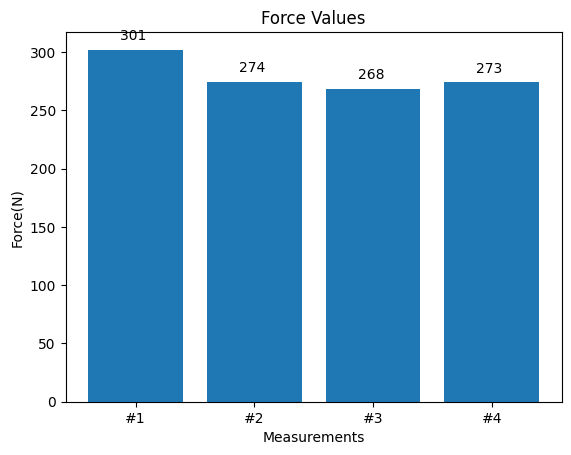

In [110]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def process_h5_file(file_name, gain, threshold1, threshold2, title, x_label, y_label):
    """
    处理 .h5 文件，提取 Force 数据的波峰值，计算波峰的平均值，并绘制柱状图。

    参数:
    file_name (str): .h5 文件的名称
    gain (float): Force 数据的增益
    threshold1 (float): 初始波峰的阈值
    threshold2 (float): 二次筛选波峰的阈值
    title (str): 柱状图的标题
    x_label (str): 横轴的标签
    y_label (str): 纵轴的标签
    """
    # 打开 .h5 文件
    with h5py.File(file_name, 'r') as file:
        # 读取 Force 数据
        force_data = file['DAQ']['TufADC']['Data']['Force'][:]
    
    # 将 force 数据乘以 gain
    force_data = force_data * gain # * or / ?

    # 初始化波峰列表
    force_peaks = []

    # 遍历 force_data 寻找波峰
    above_threshold = False
    max_value = -np.inf
    for value in force_data:
        if value > threshold1:
            above_threshold = True
            if value > max_value:
                max_value = value
        elif above_threshold and value <= threshold1:
            # 找到一个波峰
            if max_value > threshold2:
                force_peaks.append(max_value)
            above_threshold = False
            max_value = -np.inf 


    # 将 force_peaks 转换为 numpy 数组
    force_peaks = np.array(force_peaks)

    # 计算波峰的平均值
    force_average = np.mean(force_peaks)

    # 打印波峰数据和平均值
    print("Force Peaks:", force_peaks)
    print("Force Average:", force_average)

    # 绘制柱状图
    plt.bar([f'#{i+1}' for i in range(len(force_peaks))], force_peaks)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # 在柱状图上显示数值
    for i, v in enumerate(force_peaks):
        plt.text(i, v + 0.02 * max(force_peaks), f'{int(v)} ', ha='center', va='bottom')

    plt.show()

# 使用示例
file_name = '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5'  # 替换成你的文件路径
gain = 0.042  # 替换成实际的增益值
threshold1 = 100  # 初始波峰的阈值
threshold2 = 200  # 二次筛选波峰的阈值
title = 'Force Values'  # 替换成实际的标题
x_label = 'Measurements'  # 替换成实际的横轴标签
y_label = 'Force(N)'  # 替换成实际的纵轴标签

process_h5_file(file_name, gain, threshold1, threshold2, title, x_label, y_label)


In [1]:
# file name: 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5

## 柱状图v1.0
### 同一温度下，三个电压
### 功能分块

Force Peaks for 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5: [301.938 274.554 268.674 273.882]
Force Peaks for 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5: [301.938 274.554 268.674 273.882]
Force Peaks for 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5: [301.938 274.554 268.674 273.882]


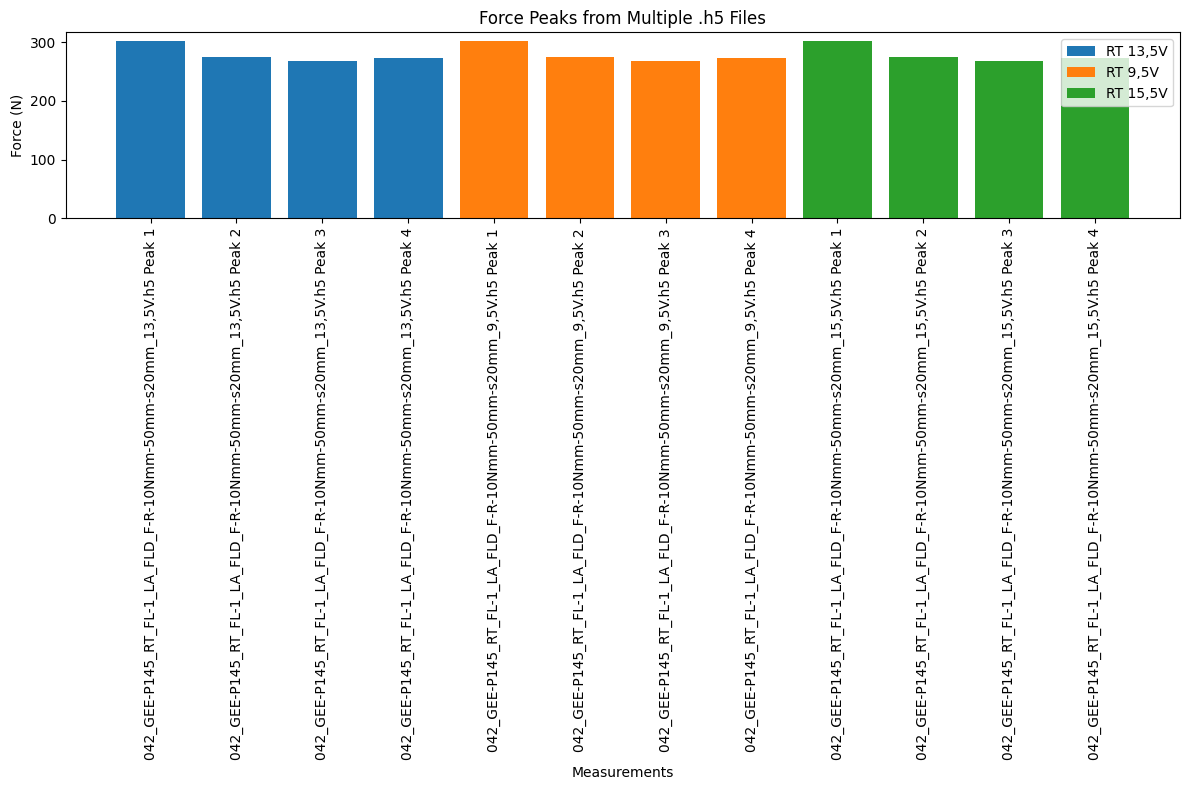

In [111]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import re

# 全局变量，用于存储找到的波峰
force_peaks_dict = {}

def find_peaks(file_name, gain, threshold1, threshold2):
    """
    查找 .h5 文件中的 Force 数据波峰值。

    参数:
    file_name (str): .h5 文件的名称
    gain (float): Force 数据的增益
    threshold1 (float): 初始波峰的阈值
    threshold2 (float): 二次筛选波峰的阈值
    """
    # 打开 .h5 文件
    with h5py.File(file_name, 'r') as file:
        # 读取 Force 数据
        force_data = file['DAQ']['TufADC']['Data']['Force'][:]
    
    # 将 force 数据乘以 gain
    force_data = force_data * gain

    # 初始化波峰列表
    force_peaks = []

    # 遍历 force_data 寻找波峰
    above_threshold = False
    max_value = -np.inf
    for value in force_data:
        if value > threshold1:
            above_threshold = True
            if value > max_value:
                max_value = value
        elif above_threshold and value <= threshold1:
            # 找到一个波峰
            if max_value > threshold2:
                force_peaks.append(max_value)
            above_threshold = False
            max_value = -np.inf


    # 将 force_peaks 转换为 numpy 数组
    force_peaks = np.array(force_peaks)

    # 打印波峰数据
    print(f"Force Peaks for {file_name}: {force_peaks}")
    return force_peaks

def extract_labels(file_name):
    """
    从文件名中提取标签。

    参数:
    file_name (str): .h5 文件的名称

    返回:
    tuple: 标签1和标签2
    """
    # 标签1: 匹配形如"-'xx'C"或者"RT"的字符
    match1 = re.search(r"-(\d{1,2})C|RT", file_name)
    label1 = match1.group() if match1 else None

    # 标签2: 匹配形如"xx,xV"的字符
    match2 = re.search(r"(\d{1,2},\d)V", file_name)
    label2 = match2.group() if match2 else None

    return label1, label2

def process_files(file_names, gain, threshold1, threshold2):
    """
    处理多个 .h5 文件，提取数据并打上标签。

    参数:
    file_names (list): .h5 文件的名称列表
    gain (float): Force 数据的增益
    threshold1 (float): 初始波峰的阈值
    threshold2 (float): 二次筛选波峰的阈值
    """
    global force_peaks_dict

    for file_name in file_names:
        # 查找波峰
        force_peaks = find_peaks(file_name, gain, threshold1, threshold2)

        # 提取标签
        label1, label2 = extract_labels(file_name)

        # 将数据存入字典
        force_peaks_dict[file_name] = {'peaks': force_peaks, 'label1': label1, 'label2': label2}

def plot_bar_charts():
    """
    绘制柱状图。
    """
    global force_peaks_dict

    plt.figure(figsize=(12, 8))

    for i, (file_name, data) in enumerate(force_peaks_dict.items()):
        plt.bar([f'{file_name} Peak {j+1}' for j in range(len(data['peaks']))], data['peaks'], label=f"{data['label1']} {data['label2']}")

    plt.xlabel('Measurements')
    plt.ylabel('Force (N)')
    plt.title('Force Peaks from Multiple .h5 Files')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 使用示例
file_names = [
    '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5',  # 替换成实际文件路径
    '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5',
    '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5'  # 替换成实际文件路径
]
gain = 0.042  # 替换成实际的增益值
threshold1 = 100  # 初始波峰的阈值
threshold2 = 200  # 二次筛选波峰的阈值

# 处理文件并提取数据
process_files(file_names, gain, threshold1, threshold2)

# 绘制柱状图
plot_bar_charts()


In [88]:
#

In [87]:
#

In [86]:
#

## 柱状图v2.0
### 三温度、三电压
### 显示average, max, min

Force Peaks for 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_-30C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_-30C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_-30C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_+80C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_+80C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5: [301, 274, 268, 273]
Force Peaks for 042_GEE-P145_+80C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5: [301, 274, 268, 273]


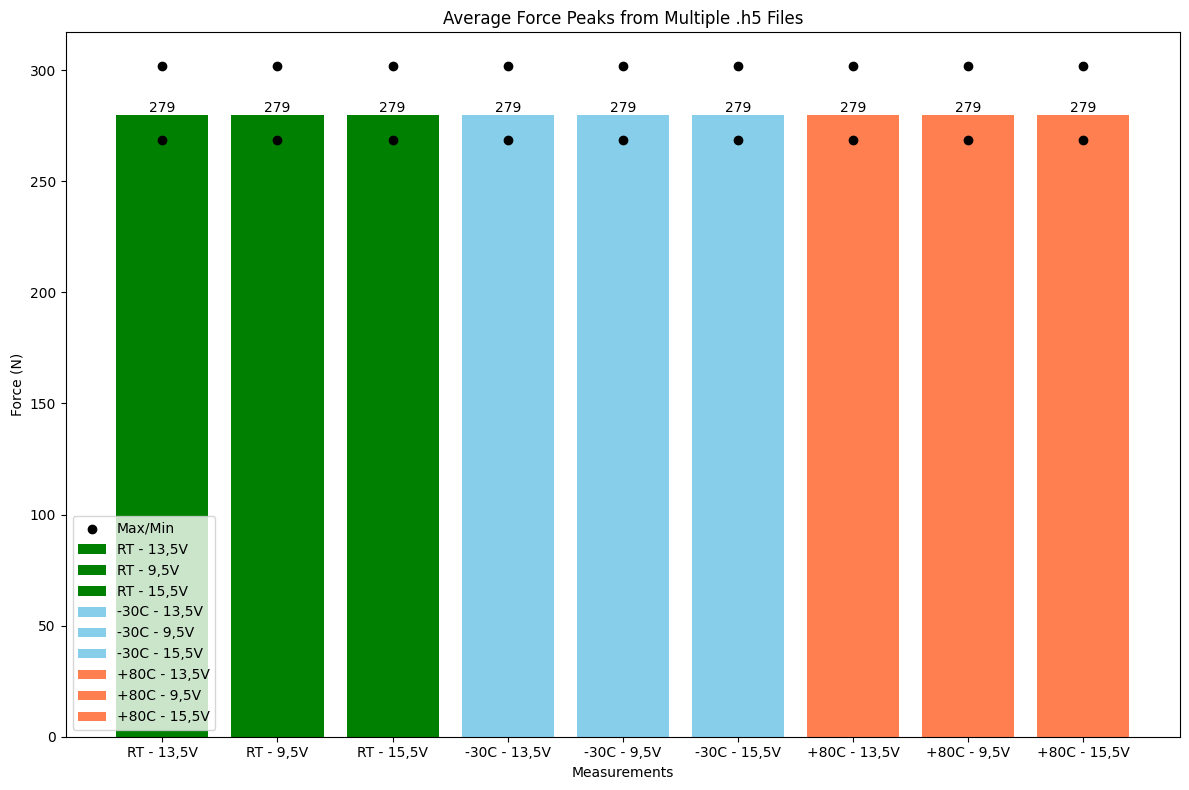

In [112]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import re

# 全局变量，用于存储找到的波峰
force_peaks_dict = {}

def find_peaks(file_name, gain, offset, threshold1, threshold2):
    """ 查找 .h5 文件中的 Force 数据波峰值。 """
    with h5py.File(file_name, 'r') as file:
        force_data = file['DAQ']['TufADC']['Data']['Force'][:]
    
    force_data = force_data * gain - offset
    force_peaks = []

    above_threshold = False
    max_value = -np.inf
    for value in force_data:
        if value > threshold1:
            above_threshold = True
            if value > max_value:
                max_value = value
        elif above_threshold and value <= threshold1:
            if max_value > threshold2:
                force_peaks.append(max_value)
            above_threshold = False
            max_value = -np.inf

    if above_threshold and max_value > threshold2:
        force_peaks.append(max_value)
        
    force_peaks = np.array(force_peaks)
    print(f"Force Peaks for {file_name}: {[int(peak) for peak in force_peaks]}")
    #print(f"Force Peaks for {file_name}: {force_peaks}")
    return force_peaks

def extract_labels(file_name):
    """ 从文件名中提取标签。 """
    match1 = re.search(r"[-+]\d{1,2}C|RT", file_name)
    label1 = match1.group() if match1 else None
    #print(match1)
    match2 = re.search(r"(\d{1,2},\d)V", file_name)
    label2 = match2.group() if match2 else None
    
    # 确定颜色
    if label1 == "RT":
        color = "green"
    elif label1.startswith('-'):
        #color = "green"
        color = "skyblue"
    else:  # label1必须是以“+”开头
        #color = "green"        
        color = "coral"

    return label1, label2, color

def process_files(file_names, gain, offset, threshold1, threshold2):
    """ 处理多个 .h5 文件，提取数据并打上标签。 """
    global force_peaks_dict

    for file_name in file_names:
        force_peaks = find_peaks(file_name, gain, offset, threshold1, threshold2)
        label1, label2, color = extract_labels(file_name)
        force_peaks_dict[file_name] = {'peaks': force_peaks, 'label1': label1, 'label2': label2, 'color': color}

def plot_bar_charts():
    """ 绘制柱状图。 """
    global force_peaks_dict
    plt.figure(figsize=(12, 8))

    for i, (file_name, data) in enumerate(force_peaks_dict.items()):
        peaks = data['peaks']
        if len(peaks) > 0:
            avg_peak = np.mean(peaks)
            max_peak = np.max(peaks)
            min_peak = np.min(peaks)
            
            # 使用 label1 - label2 作为 x 标签
            x_label = f"{data['label1']} - {data['label2']}"
            #bar = plt.bar(x_label, avg_peak, label=x_label)

            bar = plt.bar(x_label, avg_peak, color=data['color'], label=x_label)  # 使用提取的颜色
            
            # 在柱子顶部显示平均值
            plt.text(bar[0].get_x() + bar[0].get_width() / 2, avg_peak, f'{int(avg_peak)}', 
                     ha='center', va='bottom')

            # 画点表示最大值和最小值
            plt.scatter([bar[0].get_x() + bar[0].get_width() / 2] * 2, [max_peak, min_peak], 
                        color='black', zorder=5, label='Max/Min' if i == 0 else "")
            
           # color.append(colors[i])

            
    plt.xlabel('Measurements')
    plt.ylabel('Force (N)')
    plt.title('Average Force Peaks from Multiple .h5 Files')
    #plt.legend()
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 使用示例
file_names = [
    # 替换成实际文件路径
    '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5',
    '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5',
    '042_GEE-P145_RT_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5',
    '042_GEE-P145_-30C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5',
    '042_GEE-P145_-30C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5',
    '042_GEE-P145_-30C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5',
    '042_GEE-P145_+80C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_13,5V.h5',
    '042_GEE-P145_+80C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_9,5V.h5',
    '042_GEE-P145_+80C_FL-1_LA_FLD_F-R-10Nmm-50mm-s20mm_15,5V.h5',
]

gain = 0.042  # 替换成实际的增益值
offset = 0
threshold1 = 100  # 初始波峰的阈值
threshold2 = 200  # 二次筛选波峰的阈值

# 处理文件并提取数据
process_files(file_names, gain, offset, threshold1, threshold2)

# 绘制柱状图
plot_bar_charts()

### PS:
1. 柱子的顺序是传入文件的排列顺序
2. 目前只处理显示了测量方式下的三温度三电压

In [85]:
#